**Upload dataset file**

In [1]:
from google.colab import files
uploaded = files.upload()


Saving titanic.csv to titanic.csv


**Import libraries**


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


**Load dataset file**


In [3]:
df = pd.read_csv("titanic.csv")


**Basic data inf & summary statistics**


In [4]:
print("First 5 Rows:\n", df.head(), "\n")
print("Data Info:\n")
print(df.info(), "\n")
print("Summary Statistics (mean, std):\n", df.describe(), "\n")
print("Median Values:\n", df.median(numeric_only=True), "\n")


First 5 Rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

**Check and clean the missing values**


In [5]:
print("Missing Values in Each Column:\n", df.isnull().sum(), "\n")
df['Age'].fillna(df['Age'].mean(), inplace=True)
if 'Embarked' in df.columns and df['Embarked'].isnull().sum() > 0:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


Missing Values in Each Column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 



/tmp/ipython-input-5-3056485012.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-5-3056485012.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

**Visualizations - histograms, boxplots, correlation matrix**


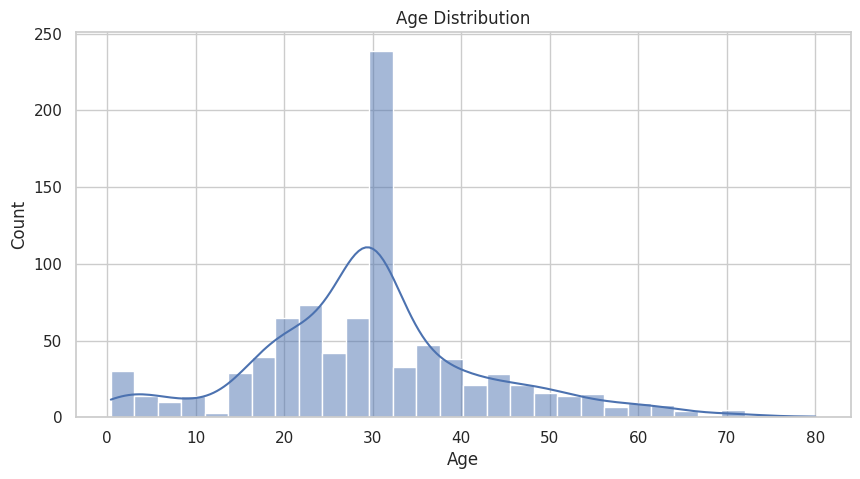

Inference: Most passengers are between 20–40 years old.


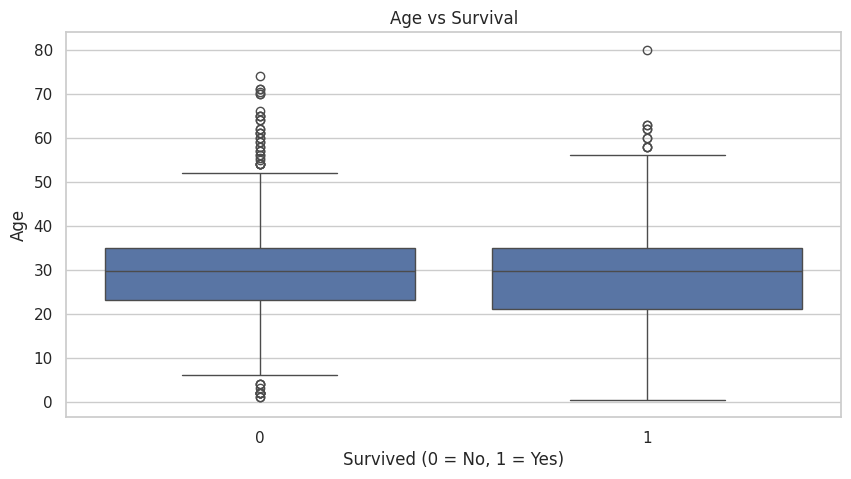

Inference: Younger passengers had slightly higher survival.


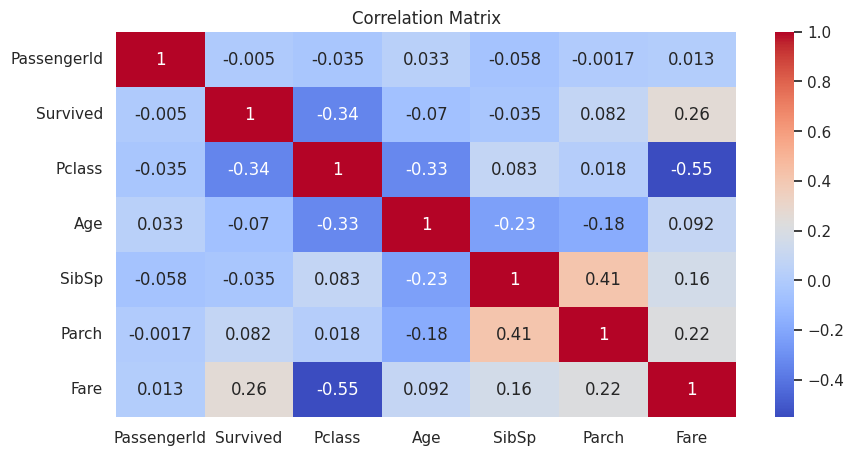

Inference: Survival correlates with Pclass (negatively) and Fare (positively).


In [6]:
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
print("Inference: Most passengers are between 20–40 years old.")

sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()
print("Inference: Younger passengers had slightly higher survival.")

numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
print("Inference: Survival correlates with Pclass (negatively) and Fare (positively).")


**Pairplot for feature relationships**


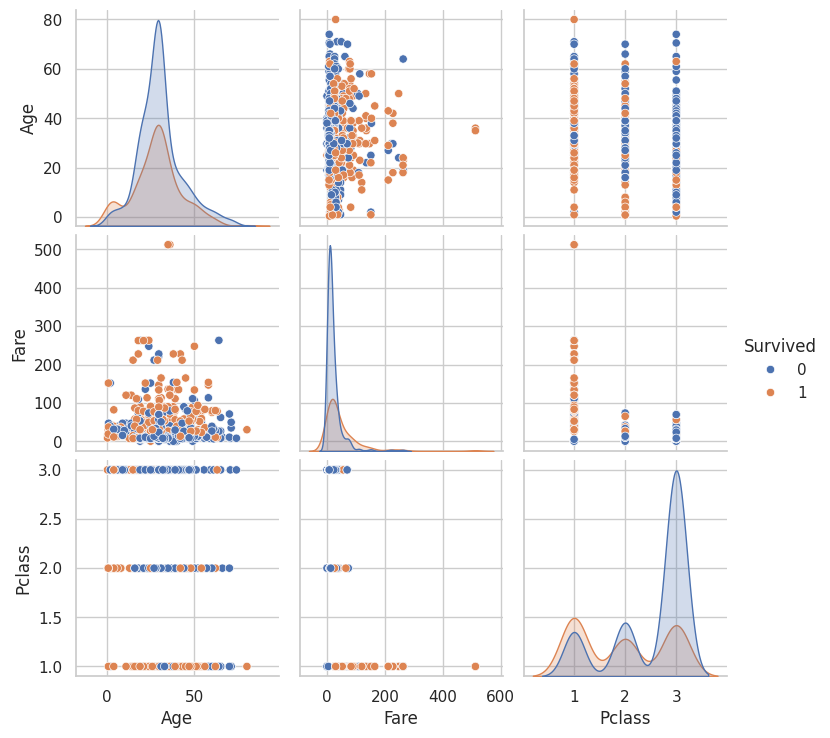

In [7]:
pairplot_cols = ['Age', 'Fare', 'Survived', 'Pclass']
sns.pairplot(df[pairplot_cols].dropna(), hue='Survived')
plt.show()


**Interactive plot - Age vs Fare by survival (Plotly)**


In [8]:
fig = px.scatter(df, x='Age', y='Fare', color='Survived',
                 title="Interactive Plot: Age vs Fare by Survival",
                 hover_data=['Sex', 'Pclass'])
fig.show()
